In [5]:
# !pip install tensorflow-gpu

In [6]:
import tensorflow as tf
print(tf.__version__)
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


2.15.0


In [7]:
## Part 1: DATA HANDLING AND PREPROCESSING

dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
## Divide dataset into independent and dependent feats
X=dataset.iloc[:, 3:13]
y=dataset.iloc[:, 13]

print("Independent Feature \n")
print(X.head())
print("################################# \n")
print("Dependent Feature \n")
print(y.head())

Independent Feature 

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10  
################################# 

Dependent Feature 

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64


In [16]:
## Feature Engineering
geography=pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [20]:
# concatenate these variables with dataframe
X=X.drop(['Geography', 'Gender'], axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [22]:
X=pd.concat([X,geography,gender], axis=1)

In [23]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [24]:
# Feature Sclaing

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [29]:
print(X_test.shape)
print(X_train.shape)


(2000, 11)
(8000, 11)


In [30]:
# Part 2: MODEL

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [33]:
# ANN

classifier = Sequential()
# Add input layer
classifier.add(Dense(units=11, activation='relu'))
# Add 1st hidden layer
classifier.add(Dense(units=7,activation='relu'))
# Add 2nd hidden layer
classifier.add(Dense(units=6,activation='relu'))
# Add output layer
classifier.add(Dense(1,activation='sigmoid'))

classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [37]:
# EARLY STOPPING
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
536/536 [==============================] - 5s 8ms/step - loss: 0.3535 - accuracy: 0.8526 - val_loss: 0.3847 - val_accuracy: 0.8292
Epoch 2/100
536/536 [==============================] - 5s 9ms/step - loss: 0.3507 - accuracy: 0.8528 - val_loss: 0.3765 - val_accuracy: 0.8383
Epoch 3/100
536/536 [==============================] - 5s 9ms/step - loss: 0.3466 - accuracy: 0.8572 - val_loss: 0.3795 - val_accuracy: 0.8345
Epoch 4/100
536/536 [==============================] - 4s 8ms/step - loss: 0.3447 - accuracy: 0.8554 - val_loss: 0.3724 - val_accuracy: 0.8429
Epoch 5/100
536/536 [==============================] - 4s 8ms/step - loss: 0.3431 - accuracy: 0.8591 - val_loss: 0.3682 - val_accuracy: 0.8459
Epoch 6/100
536/536 [==============================] - 5s 10ms/step - loss: 0.3404 - accuracy: 0.8617 - val_loss: 0.3718 - val_accuracy: 0.8451
Epoch 7/100
536/536 [==============================] - 3s 6ms/step - loss: 0.3395 - accuracy: 0.8599 - val_loss: 0.3701 - val_accuracy: 0.844

In [38]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

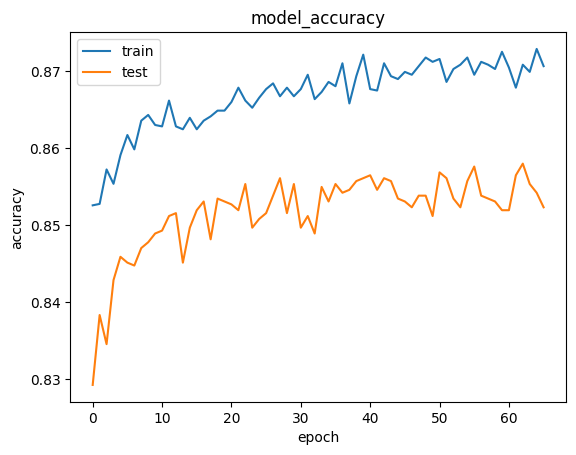

In [39]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

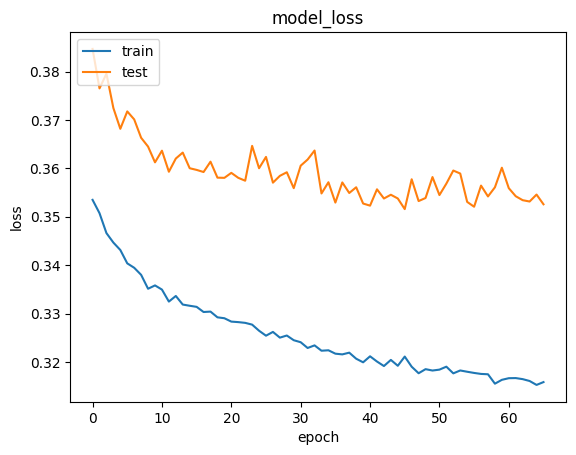

In [40]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [41]:
## Part 3: MAKING PREDICTIONS AND EVALUATION OF THE MODEL

# PREDICTING THE TEST RESULTS
y_pred=classifier.predict(X_test)
y_pred=(y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [42]:
## confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1509,   64],
       [ 235,  192]])

In [44]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8505

In [45]:
# check weights

classifier.get_weights()

[array([[-0.05808721, -0.1515293 ,  0.01255436,  0.17617929, -0.25866142,
         -0.46002108, -0.01457017, -0.21858087, -0.37504992,  0.1637028 ,
          0.13141108],
        [-0.19680767, -0.31612924, -0.41149274, -0.27496493, -0.72768897,
         -0.05496522,  0.24209951, -0.3245202 ,  1.1229888 , -0.7146198 ,
         -0.33105266],
        [-0.18877245,  0.11579241,  0.23941402, -0.02594695, -0.21228606,
         -0.23068935,  0.11459996,  0.16885556, -0.17247145, -0.16556811,
         -0.06296866],
        [ 0.5840813 ,  0.15964681,  0.02016355,  0.7030438 ,  0.19087298,
          0.31085628, -0.36665604,  0.4028799 , -0.23391417, -0.32005996,
         -0.29731554],
        [-0.15859532, -0.38365513, -0.40230504,  0.59931636, -0.50465626,
         -1.1727523 , -0.56766886, -0.06850107,  0.642333  , -0.22755359,
         -1.1121273 ],
        [-0.00591043, -0.19647598,  0.13897088,  0.12490913, -0.29922158,
         -0.20925133,  0.01600573, -0.09536456, -0.23481238,  0.1322364